In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

In [ ]:
np.set_printoptions(precision=8)

### $\beta$-scaling (but the original estimator)

In [ ]:
data = np.loadtxt("../ProcessedData/2D_32_1024_ls_16.666667_1.000000_extrapolations_10001_S2.dat")
ℓ = data[:,0]
y = data[:,1]
y_err = data[:,2]

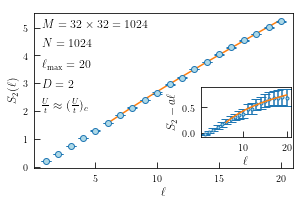

In [15]:

with plt.style.context('../IOP_large.mplstyle'):

    fig,ax1 = plt.subplots()
    
    ax1.errorbar(ℓ,y,y_err, fmt='.', capsize=5,label='square',marker='o',mfc="lightblue");
    ax1.set_ylabel(r'$S_2(\ell)$')
    ax1.set_xlabel(r'$\ell$')
    # ax1.set_xlim(1,20.1)
    # ax1.set_ylim(0,5.4)
    # ax1.set_xticklabels([1])
    ax1.tick_params(direction='in')
    
    # Annotate system information
    ax1.annotate(r"$M=32\times32=1024$",(0.14,0.52+.35),
                xycoords='figure fraction')
    ax1.annotate(r"$N=1024$",(0.14,0.52+.25),
                xycoords='figure fraction')
    ax1.annotate(r"$\ell_{\rm{max}}=20$",(0.14,0.52+.15),
                xycoords='figure fraction')
    ax1.annotate(r"$D=2$",(0.14,0.52+.05),
                xycoords='figure fraction')
    ax1.annotate(r"$\frac{U}{t} \approx (\frac{U}{t})_c$",(0.14,0.52-.05),
                xycoords='figure fraction')
    
    # Define linear function for fitting
    def boundary_law_fit(x,a,c,d):
        return a*x + c*np.log(x) + d
    
    # Perform the linear fit
    popt_line,pcov_line=scipy.optimize.curve_fit(boundary_law_fit,ℓ[5:],y[5:],sigma=y_err[5:],p0=[1,1,1])
    
    # Extract fit parameters and their error
    a,c,d = popt_line
    a_err,c_err,d_err = np.sqrt(np.diag(pcov_line))
    
    # Plot the fit
    ℓ_fit = np.linspace(ℓ[5],max(ℓ),1000)
    y_fit = boundary_law_fit(ℓ_fit,a,c,d)
    ax1.plot(ℓ_fit[:],y_fit[:],zorder=0)
    
    # Inset
    left,bottom,width,height = [0.624,0.277,0.27,0.27*.9]
    ax2 = fig.add_axes([left,bottom,width,height])
    ax2.errorbar(ℓ[:],y[:]-a*ℓ[:],np.sqrt(y_err**2+ℓ**2*a_err**2), fmt='.', capsize=5,label='square',marker='.',mfc="lightblue");
    ax2.plot(ℓ_fit,y_fit-a*ℓ_fit,zorder=10)
    # ax2.plot(ℓ_fit,c*np.log(ℓ_fit)+d,zorder=10)
    ax2.tick_params(direction='in')
    ax2.set_ylabel(r"$S_2-a\ell$")
    ax2.set_xlabel(r"$\ell$")
    #ax2.plot(xN3,yN3,label='5',color=blue[1],linewidth=0.75)
    #ax2.plot(xN5,yN5,label='5',color=blue[1],linewidth=0.75)
    #ax2.plot(xN7,yN7,label='7',color=blue[1],linewidth=0.75)
    # ax2.plot(xN9,yN9,label='9',color=blue[1],linewidth=0.75)
    # ax2.plot(xN11,yN11,label='11',color=blue[1],linewidth=0.75)
    # ax2.plot(xN13,yN13,label='13',color=blue[1],linewidth=0.75)
    # ax2.plot(xN15,yN15,label='15',color=blue[1],linewidth=0.75)
    # ax2.plot(xN15dmrg,yN15dmrg,label='15',color=blue[2],linewidth=0.75)
    # ax2.plot(xN17dmrg,yN17dmrg,label='17',color=blue[2],linewidth=0.75)
    # ax2.plot(xN21dmrg,yN21dmrg,label='21',color=blue[2],linewidth=0.75)
    # ax2.plot(xN25dmrg,yN25dmrg,label='25',color=blue[2],linewidth=0.75)
    # ax2.plot(xN29dmrg,yN29dmrg,label='29',color=blue[2],linewidth=0.75)
    # ax2.plot(xN37dmrg,yN37dmrg,label='37',color=blue[2],linewidth=0.75)
    # ax2.plot(xN49dmrg,yN49dmrg,label='49',color=blue[2],linewidth=0.75)
    
    # Save figure
    plt.savefig("../figures/boundaryLaw_N1024.pdf",dpi=400)
    plt.savefig("../figures/boundaryLaw_N1024.svg",dpi=400)
    